# Time Series Analysis - Solution


In this notebook, we will conduct a comprehensive Time Series Analysis of the "AirPassengers" dataset. This dataset encapsulates the monthly totals of international airline passengers from 1949 to 1960. Through this analysis, we aim to uncover underlying patterns such as trends, seasonality, and cyclical changes in the data, and utilize these insights to forecast future passenger numbers.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt   
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

**Load the AirPassengers dataset and display the first few rows.**

In [2]:
df = pd.read_csv('AirPassengers.csv')

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


**Convert the 'Month' column to datetime format and set it as the index of the DataFrame.**

In [4]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

In [22]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


#  Visualize the Time Series <a class="anchor" id="5"></a>





**Define a function plot_df that takes a DataFrame and a column to plot. This function sets up the plot dimensions, labels, and aesthetics before displaying the plot.**

In [5]:
def plot_df(df, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot( y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

**Use the your function to visualize the number of passengers over time.**

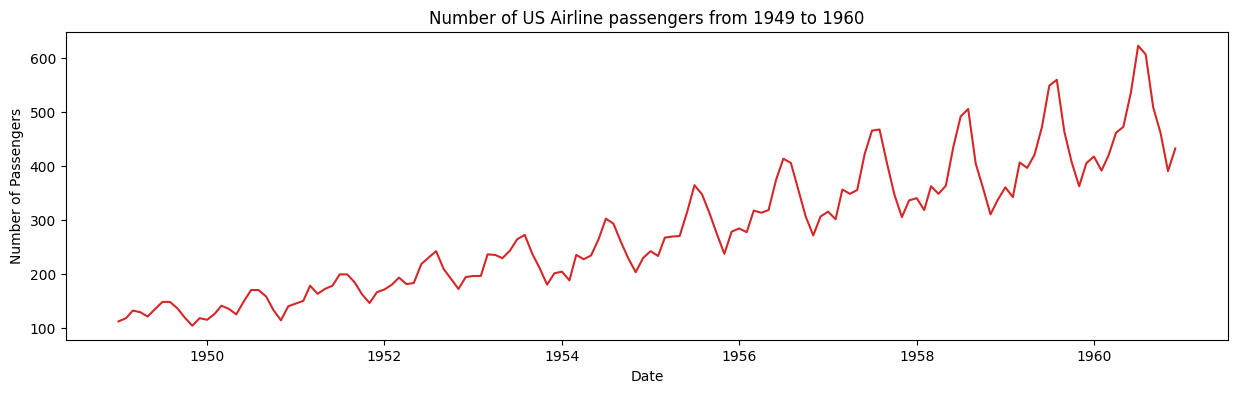

In [6]:
plot_df(df, y=df['#Passengers'], title='Number of US Airline passengers from 1949 to 1960')

# Patterns in a Time Series<a class="anchor" id="6"></a>




- Any time series visualization may consist of the following components: **Base Level + Trend + Seasonality + Error**.


### **Trend**

- A **trend** is observed when there is an increasing or decreasing slope observed in the time series. 


### **Seasonality**

- A **seasonality** is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.


However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality and vice-versa.


# Decomposition of a Time Series <a class="anchor" id="8"></a>





- Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.


- The seasonal_decompose in statsmodels implements this conveniently.

**Decompose the time series into its constituent elements using both additive and multiplicative models. The period parameter is set to 30 months.**

In [7]:
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['#Passengers'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['#Passengers'], model='additive', period=30)

**Plot the results from the multiplicative and additive decompositions to visualize trends, seasonality, and residuals.**

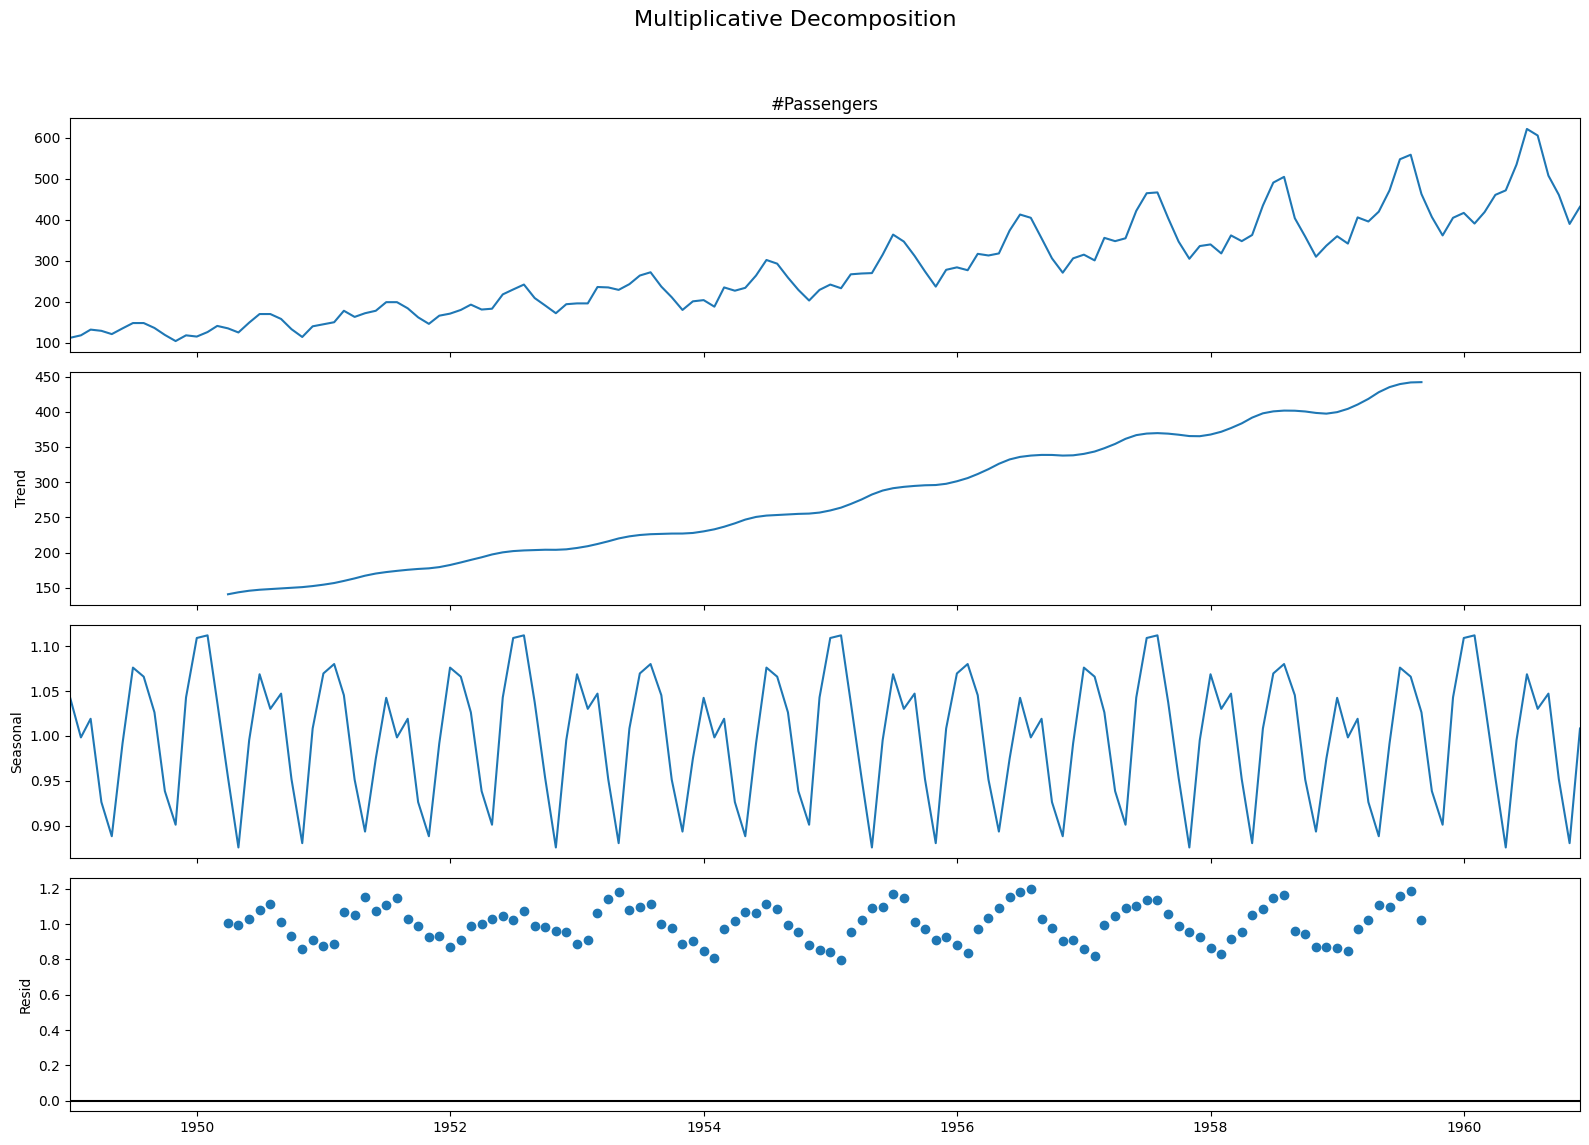

In [8]:
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

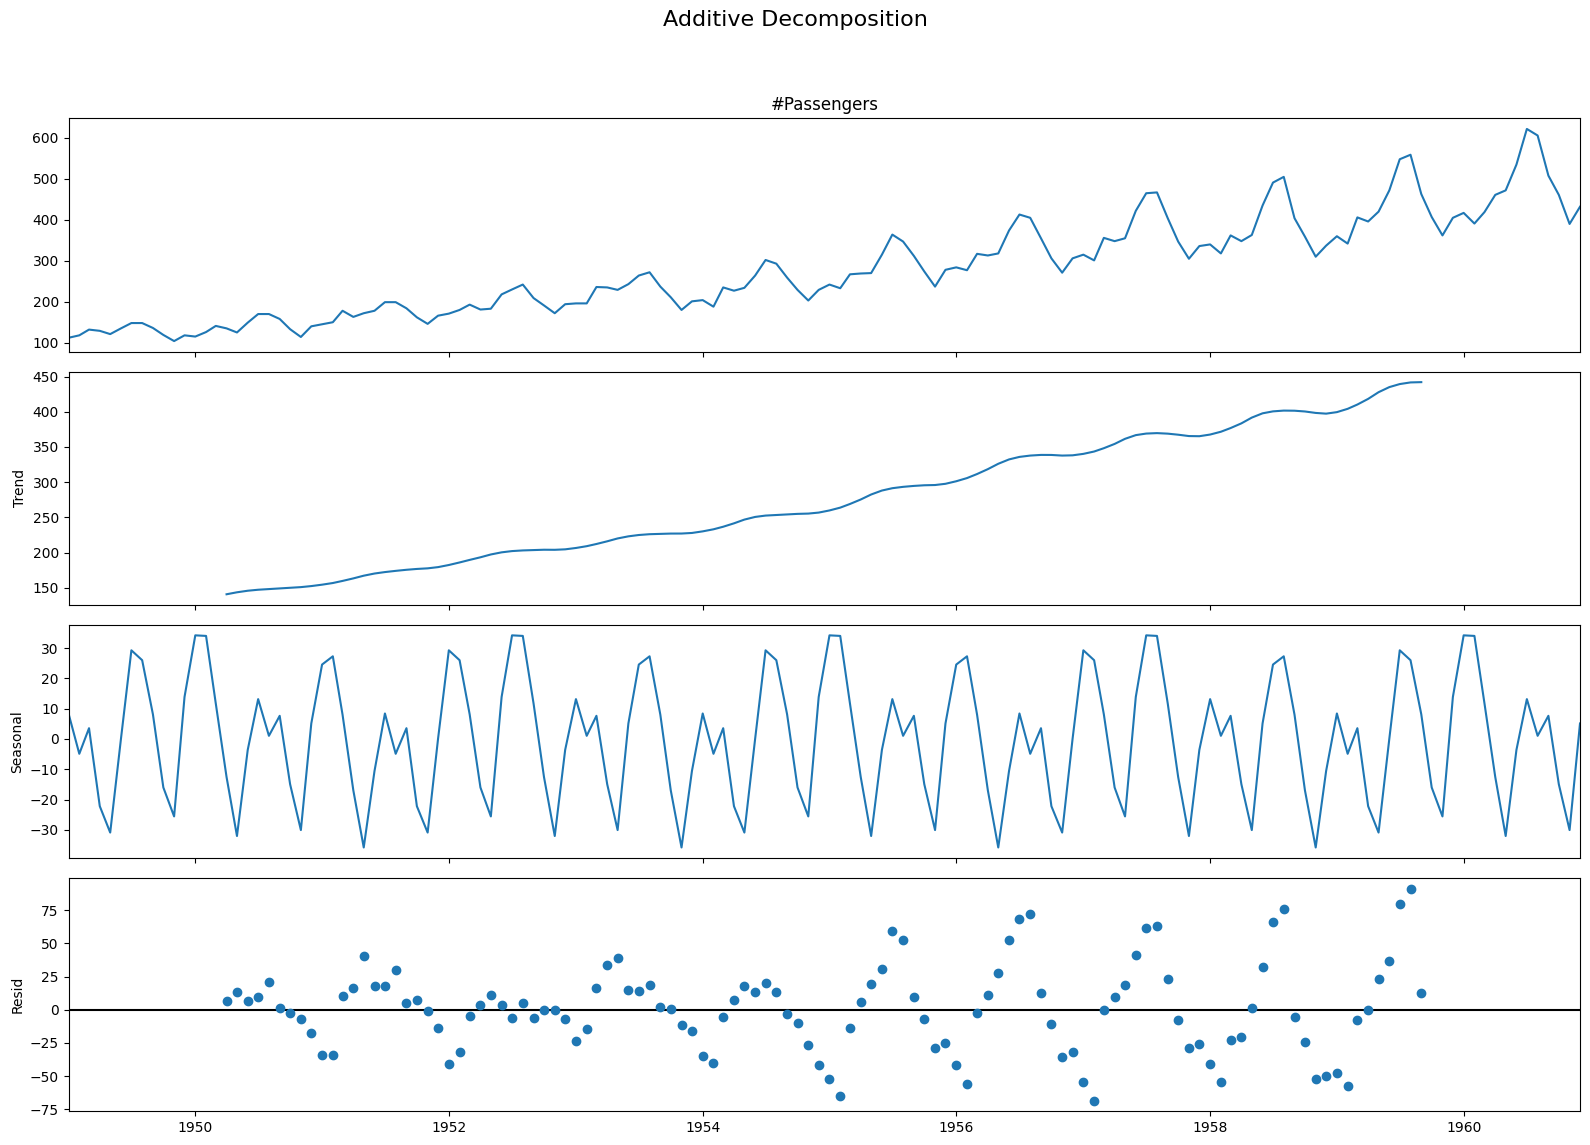

In [9]:
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

- If we look at the residuals of the additive decomposition closely, it has some pattern left over. 


<h1 id="autoregressive-moving-average-model">Autoregressive Moving Average Model</h1>


\begin{equation}
y_t^{(d)}=c+\underbrace{\phi_1 X_{t-1}^{(d)}+\phi_2 X_{t-2}^{(d)}+\ldots+\phi_p X_{t-p}^{(d)}}_{\text {Auto-Regressive}}+\varepsilon_t+\underbrace{\theta_1 \varepsilon_{t-1}+\theta_2 \varepsilon_{t-2}+\ldots+\theta_p \varepsilon_{t-q}}_{\text {Moving Average }}
\end{equation}

Where:

$X_t$ is the value of the time series at time $t$, $c$ is a constant term, $\phi_1$, $\phi_2$..... $\phi_p$ are the autoregressive coefficients, $\theta_1$, $\theta_2$......$\theta_p$ are the moving average coefficients.


**Split the data into training (80%) and testing (20%) sets.**

In [10]:
# Train-test split
train_size = int(len(df) * 0.8)  # 80% train, 20% test
train, test = df[:train_size], df[train_size:]

## Autoregressive (AR) model

**Fit an AutoReg model on the training data using 12 lags, then predict the number of passengers for the test set.**

In [11]:
ar_model = AutoReg(train, lags=12) 

/Users/nokkyu/Documents/greenbootcamps/DataScience/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [12]:
ar_model_fit = ar_model.fit()

In [13]:
ar_predictions = ar_model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)


/Users/nokkyu/Documents/greenbootcamps/DataScience/.venv/lib/python3.11/site-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


**Plot the actual vs. predicted values using the AR model to assess its performance.**

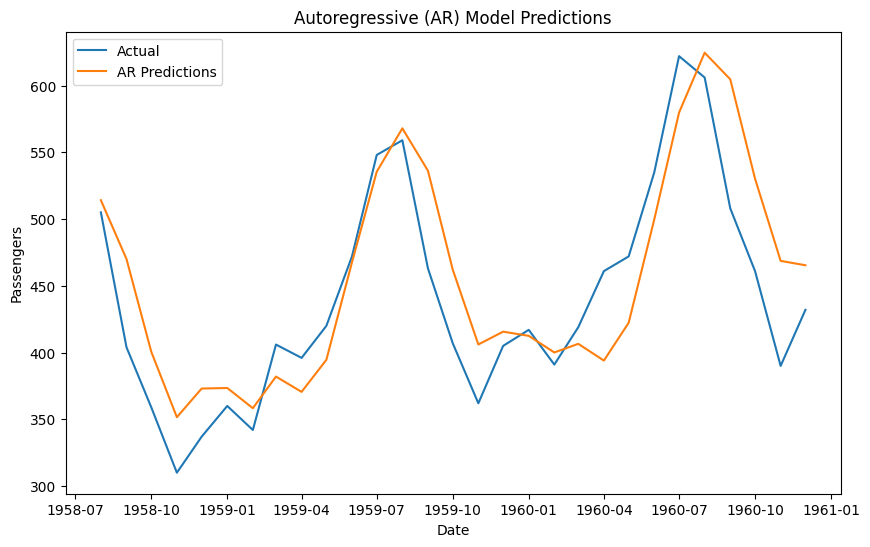

In [14]:
# Plotting AR predictions
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['#Passengers'], label='Actual')
plt.plot(ar_predictions.index, ar_predictions, label='AR Predictions')
plt.title('Autoregressive (AR) Model Predictions')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()


## ARIMA model

**Fit an ARIMA model with parameters (5,1,0) on the training data and make predictions on the test set.**

In [30]:
arima_model = ARIMA(train, order=(5,1,0), freq=train.index.inferred_freq) 

/Users/nokkyu/Documents/greenbootcamps/DataScience/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [31]:
arima_model_fit = arima_model.fit()

In [32]:
arima_predictions = arima_model_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')


/Users/nokkyu/Documents/greenbootcamps/DataScience/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


**Visualize the forecast accuracy of the ARIMA model by comparing predicted values against actual values.**

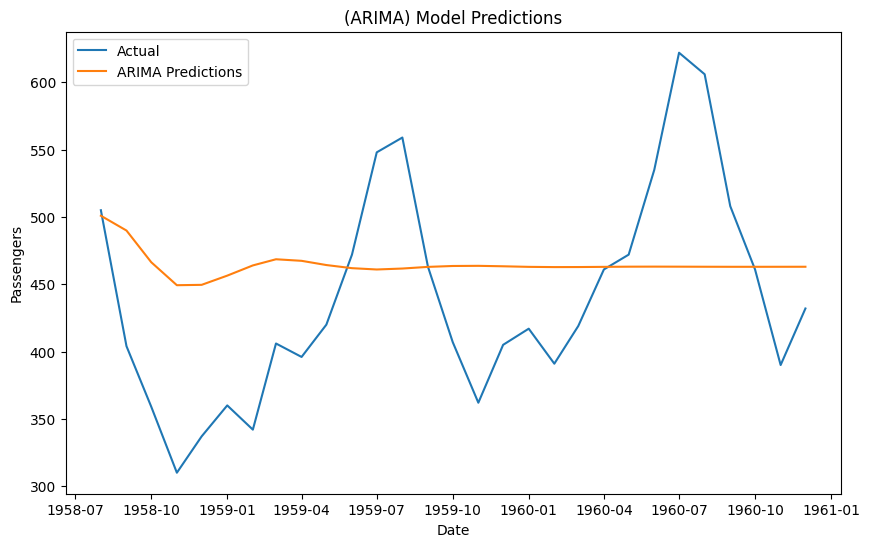

In [33]:
# Plotting ARIMA predictions
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['#Passengers'], label='Actual')
plt.plot(arima_predictions.index, arima_predictions, label='ARIMA Predictions')
plt.title('(ARIMA) Model Predictions')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

## Calculate Moving Average (MA) prediction

**Calculate the moving average of the last 12 months of the training set and extend this as a constant prediction over the test period.**

In [34]:
ma_prediction = train['#Passengers'].rolling(window=12).mean().iloc[-1]  

In [35]:
ma_prediction_series = pd.Series([ma_prediction] * len(test), index=test.index)


**Plot and compare the moving average predictions against the actual test data.**

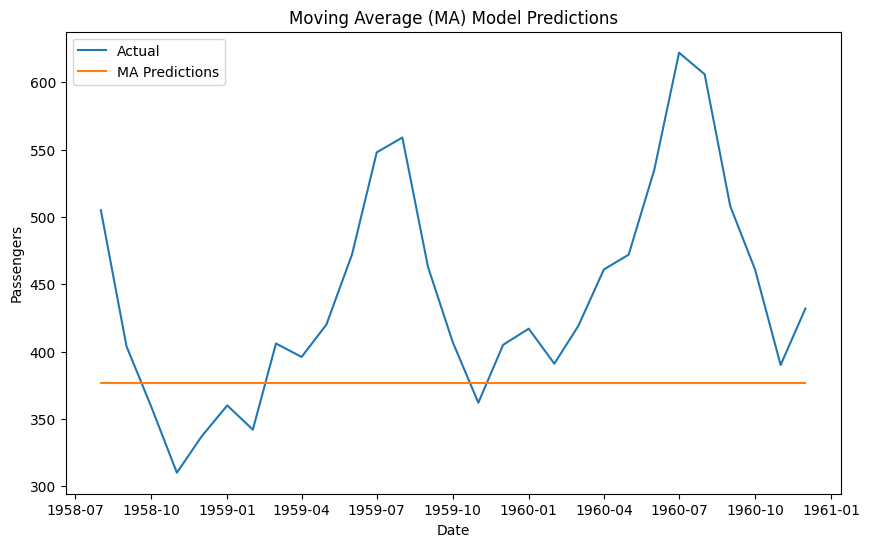

In [36]:
# Plotting MA predictions
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['#Passengers'], label='Actual')
plt.plot(ma_prediction_series.index, ma_prediction_series, label='MA Predictions')
plt.title('Moving Average (MA) Model Predictions')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()
